# plot_daily_glucose:

Convert the glucose levels to a comma-delimited  string (including  
screenshot's date) of integers to be incorporated into  a CSV-formatted 
dataset. 

In [23]:
import os, re
import pandas as pd
from pandas import DataFrame as DF, Series as Ser
import numpy as np
from matplotlib import pyplot as plt

In [24]:
# Read the screenshot showing the monitor's glucose curve
from PIL import Image
png_path = "./images/IMG_1833.PNG"
png = np.asarray(Image.open(png_path))
png_grayscale = png[:, :, 0]

csv_cropped = png_grayscale[503:1377, 88:748]
csv_df = DF(csv_cropped)

In [25]:
# mean-zeros is the mean, for each column, of the indices of the
# entries of csv_df having value 0.
mean_zeros = np.array([Ser(csv_df.iloc[:,j][csv_df.iloc[:,j] == 0].index).
    mean() for j in range(660)])

In [26]:
def pxls2mg(mean_zeros):
    '''Rescale the output to show glucose in mg/Dl'''
    return (-0.34324 * mean_zeros + 350)
    
mg_per_dl = pxls2mg(mean_zeros).astype(int)

In [27]:
def show_ori():
    '''Show the original screenshot'''
    plt.tick_params(
    axis='both',       # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,        # ticks along the left edge are off
    labelleft=False,   # labels along the left edge are off
    labelbottom=False) # labels along the bottom edge are off

    plt.imshow(png)
    plt.show()

In [28]:
def show_rescaled():
    '''Show the glucose graph rescaled to mg/Dl'''
    
    from matplotlib.pyplot import savefig
    '''
    savefig(fname, *, transparent=None, dpi='figure', format=None,
            metadata=None, bbox_inches=None, pad_inches=0.1,
            facecolor='auto', edgecolor='auto', backend=None,
            **kwargs
           )
    '''
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

    hour_ticks = np.array([i * 660/12 for i in range(13)])
    hour_labels = [
        "12 AM", "2 AM", "4 AM", "6 AM", "8 AM", "10 AM", "12 PM",
        "2 PM", "4 PM", "6 PM", "8 PM", "10 PM", "12 AM"
    ]
    fig, ax = plt.subplots()
    ax.plot(mg_per_dl, linewidth=2, color='#0F406C') # #285797 '#145188'
    ax.set_title("Day's Glucose Readings", fontweight="bold", fontsize=14)
    ax.set_xlabel("Time of Day")
    ax.set_ylabel("Glucose (mg/Dl)")
    ax.grid()
    ax.set_xticks(hour_ticks, labels=hour_labels, rotation=45, fontweight="bold")
    #)
    plt.ylim((40, 240)) 
    plt.yticks(np.arange(40, 260, step=20)) 
    plt.show()

In [29]:
# Get date from screenshot; convert to string yyyymmdd
def get_screenshot_date(png_path):
    '''Extract, convert line containing date from screenshot text'''
    
    from pandas.io.clipboard import clipboard_get
    os.system("tesseract " + png_path + 
        " stdout --dpi 72 | sed -nE '/^<.*>$/p' | pbcopy")
    date_text_raw = clipboard_get()
    # convert date to eight-digit string
    months = ["January", "February", "March", "April",
              "May", "June", "July", "August",
              "September", "October","November", "December"]
    m = re.search("(\w+) (\d+),\ *(\d{4})", date_text_raw)
    month, day, year = m.group(1), int(m.group(2)), m.group(3)
    return f"{year:4s}{months.index(month)+1:02d}{day:02d}"

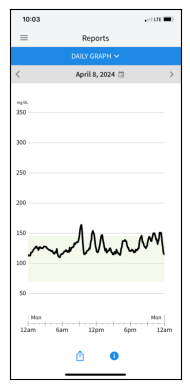

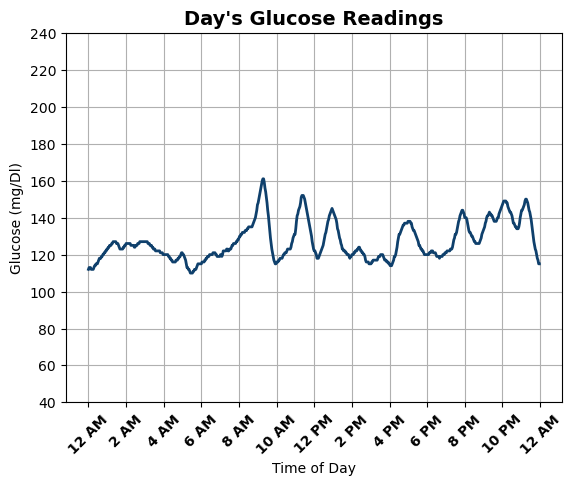

In [30]:
show_ori()
show_rescaled()

In [31]:
comma_delimited = ','.join(np.char.mod('%d', mg_per_dl))
type(comma_delimited)

str

In [32]:
# Prepend the date
comma_delimited = get_screenshot_date(png_path) + ',' + comma_delimited

< April 8,2024 (3 >

<re.Match object; span=(2, 14), match='April 8,2024'>


In [33]:
print(comma_delimited)

20240408,112,113,113,113,112,112,112,112,113,114,114,115,115,115,116,117,118,118,118,119,119,120,120,121,121,122,122,123,123,124,124,125,125,125,126,126,127,127,127,127,127,126,126,126,125,124,123,123,123,123,123,124,124,125,125,126,126,126,126,126,126,126,125,125,125,125,125,124,124,125,125,125,126,126,126,127,127,127,127,127,127,127,127,127,127,127,127,126,126,126,125,125,125,124,124,123,123,123,122,122,122,122,122,122,122,121,121,121,121,120,120,120,120,120,120,120,120,119,119,118,118,117,117,116,116,116,116,116,117,117,117,118,118,119,119,120,121,121,120,120,119,118,117,115,113,113,112,112,111,110,110,110,110,111,111,112,112,112,113,114,115,115,115,115,115,115,116,116,116,116,117,117,118,118,119,119,119,120,120,120,120,120,121,121,121,121,120,120,119,119,119,119,119,120,120,119,120,122,122,122,122,122,123,123,122,122,123,123,123,124,125,125,126,126,126,126,127,127,128,128,129,130,130,131,131,132,132,132,132,133,133,133,134,134,135,135,135,135,135,135,136,137,138,139,140,142,144,147